In [19]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
columns_encoded.akademische_laufbahn

'Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?'

# Clustering #

In [22]:
# Scale the data first

# Create a copy of data (with only numerical values)
data_numerical = data.copy().select_dtypes(include='number')

print(data_numerical.value_counts())

# TODO: Maybe create a subset of the dataframe here by dropping features we don't want to include in the clustering

# Scale the data
scaler = StandardScaler()
scaler.fit(data_numerical)
data_scaled = pd.DataFrame(scaler.transform(data_numerical),
                           columns= data_numerical.columns )

Alter  Als wie sportlich würdest du dich einschätzen?  Welche Rolle spielt für dich gesunde Ernährung?   Wie gerne gehst du Essen oder Trinken?  Wie gerne kochst du selbst?  Wie gerne gehst du feiern?  Wie sehr interessierst du dich für Musik?  Wie gerne liest Du?  Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?  Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?  Wie sehr interessierst du dich für bildende Kunst wie\nMalen, Zeichnen oder Fotografie?  Wie gerne besuchst du Museen?  Wie sehr interessierst du dich für Videospiele?  Wie häufig nutzt du soziale Medien?  Wie groß ist dein Interesse an Technologie und Innovation,\nwie beispielsweise Programmierung, Robotik und Virtual Reality?  Wie groß ist dein Interesse an Astronomie, Weltraumforschung\noder astronomiebezogenen Aktivitäten?  Wie groß ist dein Interesse an Naturwissenschaften\nwie Biologie, Chemie und Physik?  Wie sehr interessierst du sich für gesellschaftliches\nEng

In [23]:
data_scaled.head()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?",...,sportarten_Leichtathletik,sportarten_Reiten,sportarten_Rennrad/Mountainbike,sportarten_Schwimmen,sportarten_Tanzen,sportarten_Tennis,sportarten_Volleyball,sportarten_Wassersport,sportarten_Wintersport,sportarten_Yoga
0,0.555073,0.728893,0.552967,-0.871197,0.181800,0.153296,1.071517,0.727409,0.314127,-0.827253,...,-0.356753,-0.182574,1.941451,-0.74162,-0.564933,-0.3849,-0.614636,-0.262613,-0.296174,1.941451
1,0.105210,-0.298183,0.552967,0.147939,1.206488,-0.710737,0.000000,-0.912567,0.314127,0.287740,...,-0.356753,-0.182574,1.941451,-0.74162,-0.564933,-0.3849,1.626978,-0.262613,-0.296174,1.941451
2,-0.344653,-1.325259,1.777393,0.147939,0.181800,0.153296,1.071517,-0.912567,0.314127,0.287740,...,-0.356753,-0.182574,-0.515079,-0.74162,1.770122,-0.3849,-0.614636,-0.262613,-0.296174,1.941451
3,-0.569585,1.755968,-1.895886,0.147939,0.181800,-0.710737,-1.071517,-0.092579,-0.532650,0.287740,...,2.803060,-0.182574,-0.515079,-0.74162,-0.564933,-0.3849,-0.614636,-0.262613,3.376389,-0.515079
4,-0.344653,-0.298183,0.552967,-0.871197,-1.867577,-1.574770,-1.071517,0.727409,-0.532650,1.402733,...,-0.356753,-0.182574,-0.515079,-0.74162,-0.564933,-0.3849,-0.614636,-0.262613,-0.296174,-0.515079


In [24]:
# TODO: Parameter tuning!
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Konstantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
data["cluster"] = kmeans.labels_

# TODO: Sinnvolle Plots finden und daraus Schlüsse ziehen #

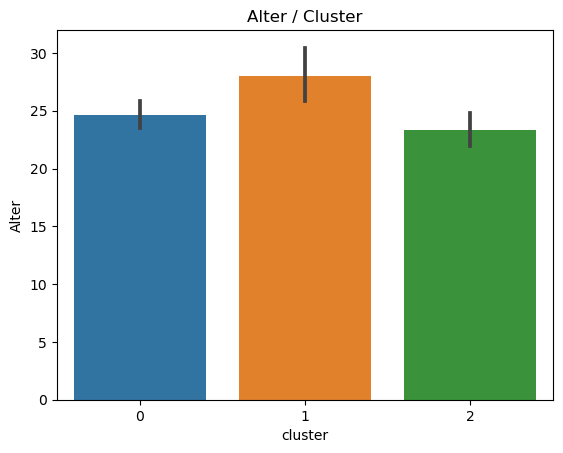

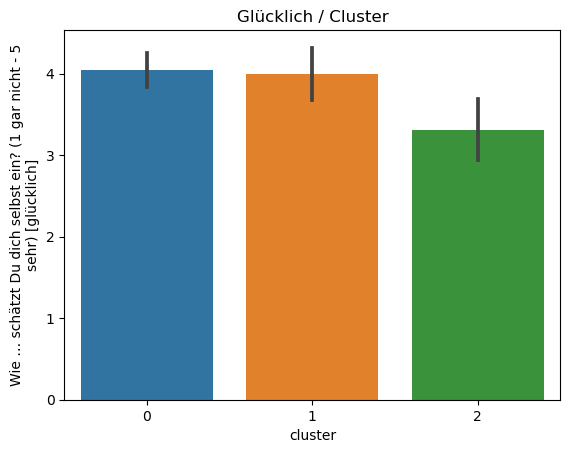

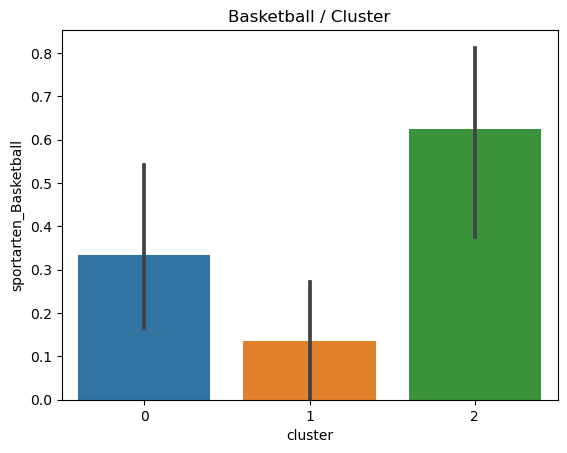

In [26]:
sb.barplot(x='cluster', y=columns.alter, data=data)
plt.title("Alter / Cluster")
plt.show()

sb.barplot(x='cluster', y=columns.gluecklich, data=data)
plt.title("Glücklich / Cluster")
plt.show()

sb.barplot(x='cluster', y=columns.sportarten_Basketball, data=data)
plt.title("Basketball / Cluster")
plt.show()

<Axes: xlabel='cluster', ylabel='Welche Rolle spielt für dich gesunde Ernährung? '>

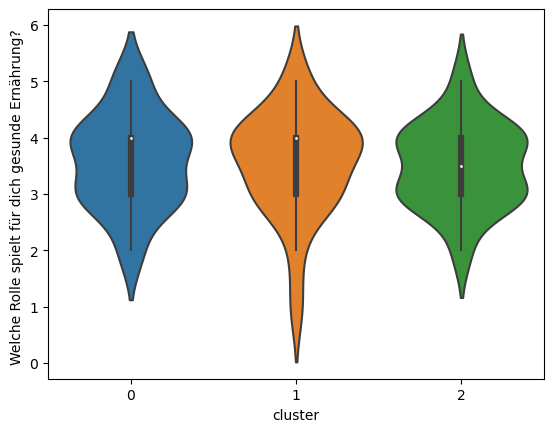

In [27]:
sb.violinplot(data=data, y=columns.ernaehrung, x="cluster")

# TODO: Weitere Algorithmen ausprobieren und Schlüsse aus den Ergebnissen ziehen #

z. B. DBSCAN